In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("diamonds.csv")
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Data Preprocessing Step**

In [3]:
df = df.drop(columns=["Unnamed: 0"])

In [4]:
num_cols = ["carat", "depth", "table", "price", "x", "y", "z"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

### Handling missing value

In [5]:
bad_summary = {
    "x == 0": (df["x"] == 0).sum(),
    "y == 0": (df["y"] == 0).sum(),
    "z == 0": (df["z"] == 0).sum(),
    "carat <= 0": (df["carat"] <= 0).sum(),
    "price <= 0": (df["price"] <= 0).sum(),
    "depth <= 0": (df["depth"] <= 0).sum(),
    "table <= 0": (df["table"] <= 0).sum(),
}

pd.DataFrame.from_dict(bad_summary, orient="index", columns=["count"])


,count
x == 0,8
y == 0,7
z == 0,20
carat <= 0,0
price <= 0,0
depth <= 0,0
table <= 0,0


In [6]:
bad_mask = (
    (df["x"] == 0) |
    (df["y"] == 0) |
    (df["z"] == 0) |
    (df["carat"] <= 0) |
    (df["price"] <= 0)
)

print("Total bad rows:", bad_mask.sum())

Total bad rows: 20


In [7]:
df.loc[bad_mask].head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


--> **Since the x, y and z is the measure of diamond, so 0 will not never exist on earth, we reegard it as missing value. So we need to handle it.** 

In [8]:
bad_xyz = (df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)

df_before = df.copy()
df_after = df.loc[~bad_xyz].copy()

print("Before shape:", df_before.shape)
print("After shape :", df_after.shape)
print("Dropped rows:", bad_xyz.sum())
print("Dropped %   :", bad_xyz.mean() * 100)


Before shape: (53940, 10)
After shape : (53920, 10)
Dropped rows: 20
Dropped %   : 0.03707823507601038


--> **The missing value is very small, we try to drop it out first.**

In [9]:
df_after.duplicated().sum()

np.int64(145)

In [10]:
df_after=df_after.drop_duplicates()

In [11]:
df_after.duplicated().sum()

np.int64(0)

In [12]:
df = df_after.copy()

## Outlier

In [13]:
df["log_price"] = np.log1p(df["price"])


In [14]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.789960
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.789960
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.793014
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.814131
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.817111
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.922261
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.922261
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.922261
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.922261


In [15]:
# Categorical columns statistics
categorical_cols = ['cut', 'color', 'clarity']
print("\n" + "="*50)
print("CATEGORICAL VARIABLES DISTRIBUTION")
print("="*50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


CATEGORICAL VARIABLES DISTRIBUTION

cut:
cut
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64
Unique values: 5

color:
color
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64
Unique values: 7

clarity:
clarity
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64
Unique values: 8


In [16]:
print(df.describe())

              carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z     log_price  
count  53775.000000  53775.000000  53775.000000  
mean       5.734909      3.539964      7.787414  
std        1.139451      0.702017      1.013782  
min        3.680000      1.070000      5.789960  
25%        4.720000      2.910000     

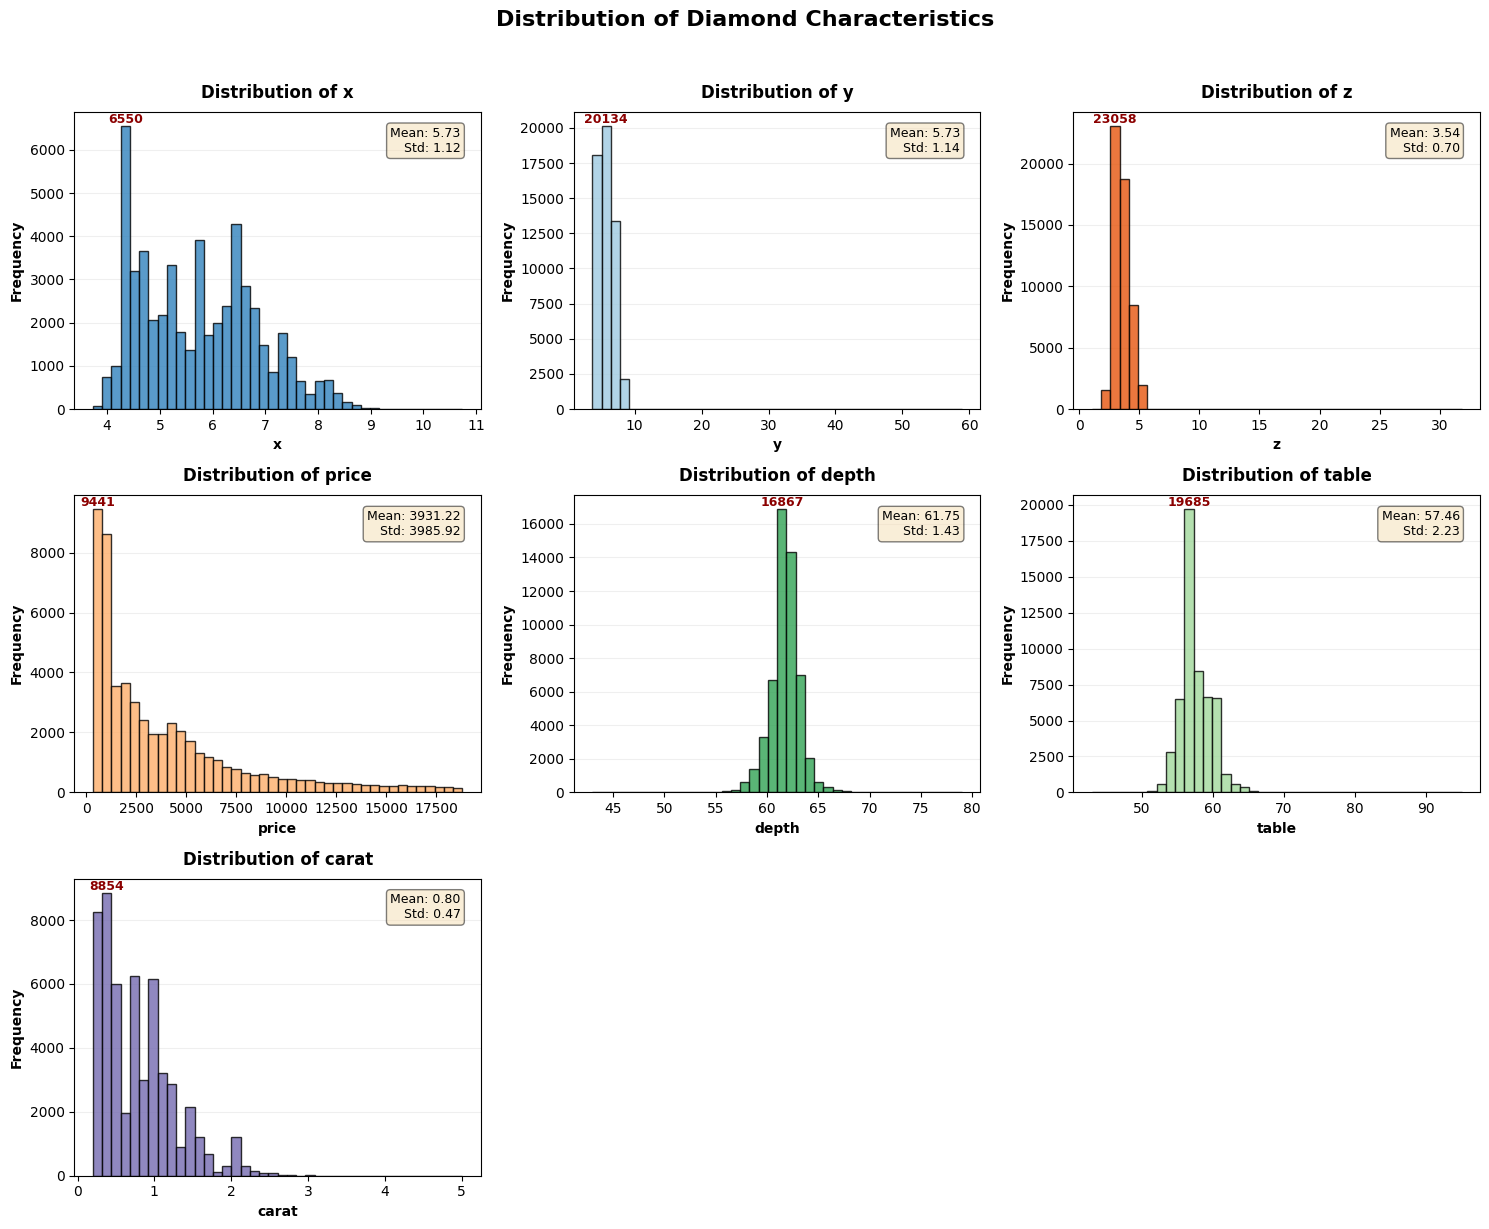

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Variables to plot
vars_xyz = ["x", "y", "z", "price", "depth", "table", "carat"]

# Create figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Get colormap
colors = plt.get_cmap("tab20c")

# Create price column if it doesn't exist
if 'price' not in df.columns:
    df['price'] = np.log1p(df['price'])

# Plot each variable
for i, (ax, col) in enumerate(zip(axes, vars_xyz)):
    color = colors(i * 2)  # pick a nice color
    data = df[col].dropna()
    
    # Plot histogram
    counts, bins, patches = ax.hist(
        data,
        bins=40,  # Reduced bins for cleaner look
        color=color,
        edgecolor="black",
        linewidth=1.0,
        alpha=0.8
    )
    
    # Customize subplot
    ax.set_title(f"Distribution of {col}", fontsize=12, fontweight="bold", pad=10)
    ax.set_xlabel(col, fontweight="bold")
    ax.set_ylabel("Frequency", fontweight="bold")
    
    # Annotate tallest bar
    if len(counts) > 0:
        max_idx = counts.argmax()
        ax.text(
            (bins[max_idx] + bins[max_idx + 1]) / 2,
            counts[max_idx],
            f"{int(counts[max_idx])}",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=9,
            color='darkred'
        )
    
    # Add grid
    ax.grid(axis="y", linestyle="-", alpha=0.2)
    ax.set_axisbelow(True)
    
    # Add statistics text box
    stats_text = f"Mean: {data.mean():.2f}\nStd: {data.std():.2f}"
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide empty subplots if any
for i in range(len(vars_xyz), len(axes)):
    axes[i].set_visible(False)

# Add overall title
fig.suptitle("Distribution of Diamond Characteristics", 
             fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

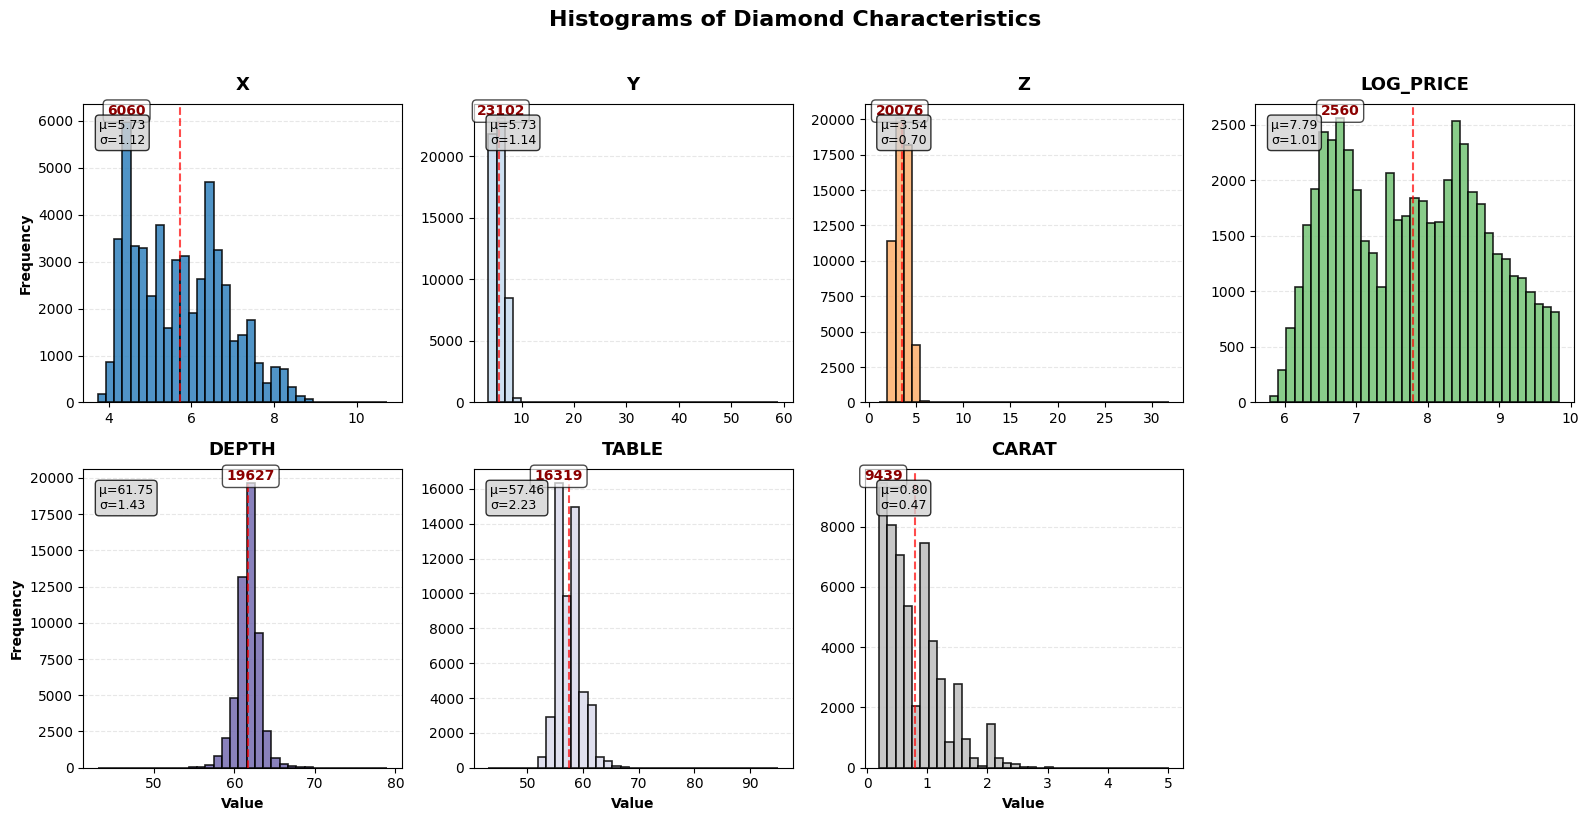

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Variables to plot
vars_xyz = ["x", "y", "z", "log_price", "depth", "table", "carat"]

# Create figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Get colormap
colors = plt.get_cmap("tab20c")


# Plot each variable
for i, col in enumerate(vars_xyz):
    ax = axes[i]
    color = colors(i * 3)  # pick a nice color
    data = df[col].dropna()
    
    # Plot histogram
    counts, bins, patches = ax.hist(
        data,
        bins=35,
        color=color,
        edgecolor="black",
        linewidth=1.2,
        alpha=0.85
    )
    
    # Customize subplot
    ax.set_title(f"{col.upper()}", fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Value" if i >= 4 else "", fontweight="bold")
    ax.set_ylabel("Frequency" if i % 4 == 0 else "", fontweight="bold")
    
    # Annotate tallest bar
    if len(counts) > 0:
        max_idx = counts.argmax()
        ax.text(
            (bins[max_idx] + bins[max_idx + 1]) / 2,
            counts[max_idx],
            f"{int(counts[max_idx])}",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=10,
            color='darkred',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
        )
    
    # Add grid
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.set_axisbelow(True)
    
    # Add mean line
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Add statistics
    ax.text(0.05, 0.95, f"μ={data.mean():.2f}\nσ={data.std():.2f}",
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='left',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Hide the last empty subplot (8th subplot for 7 variables)
axes[7].set_visible(False)

# Add overall title
fig.suptitle("Histograms of Diamond Characteristics", 
             fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

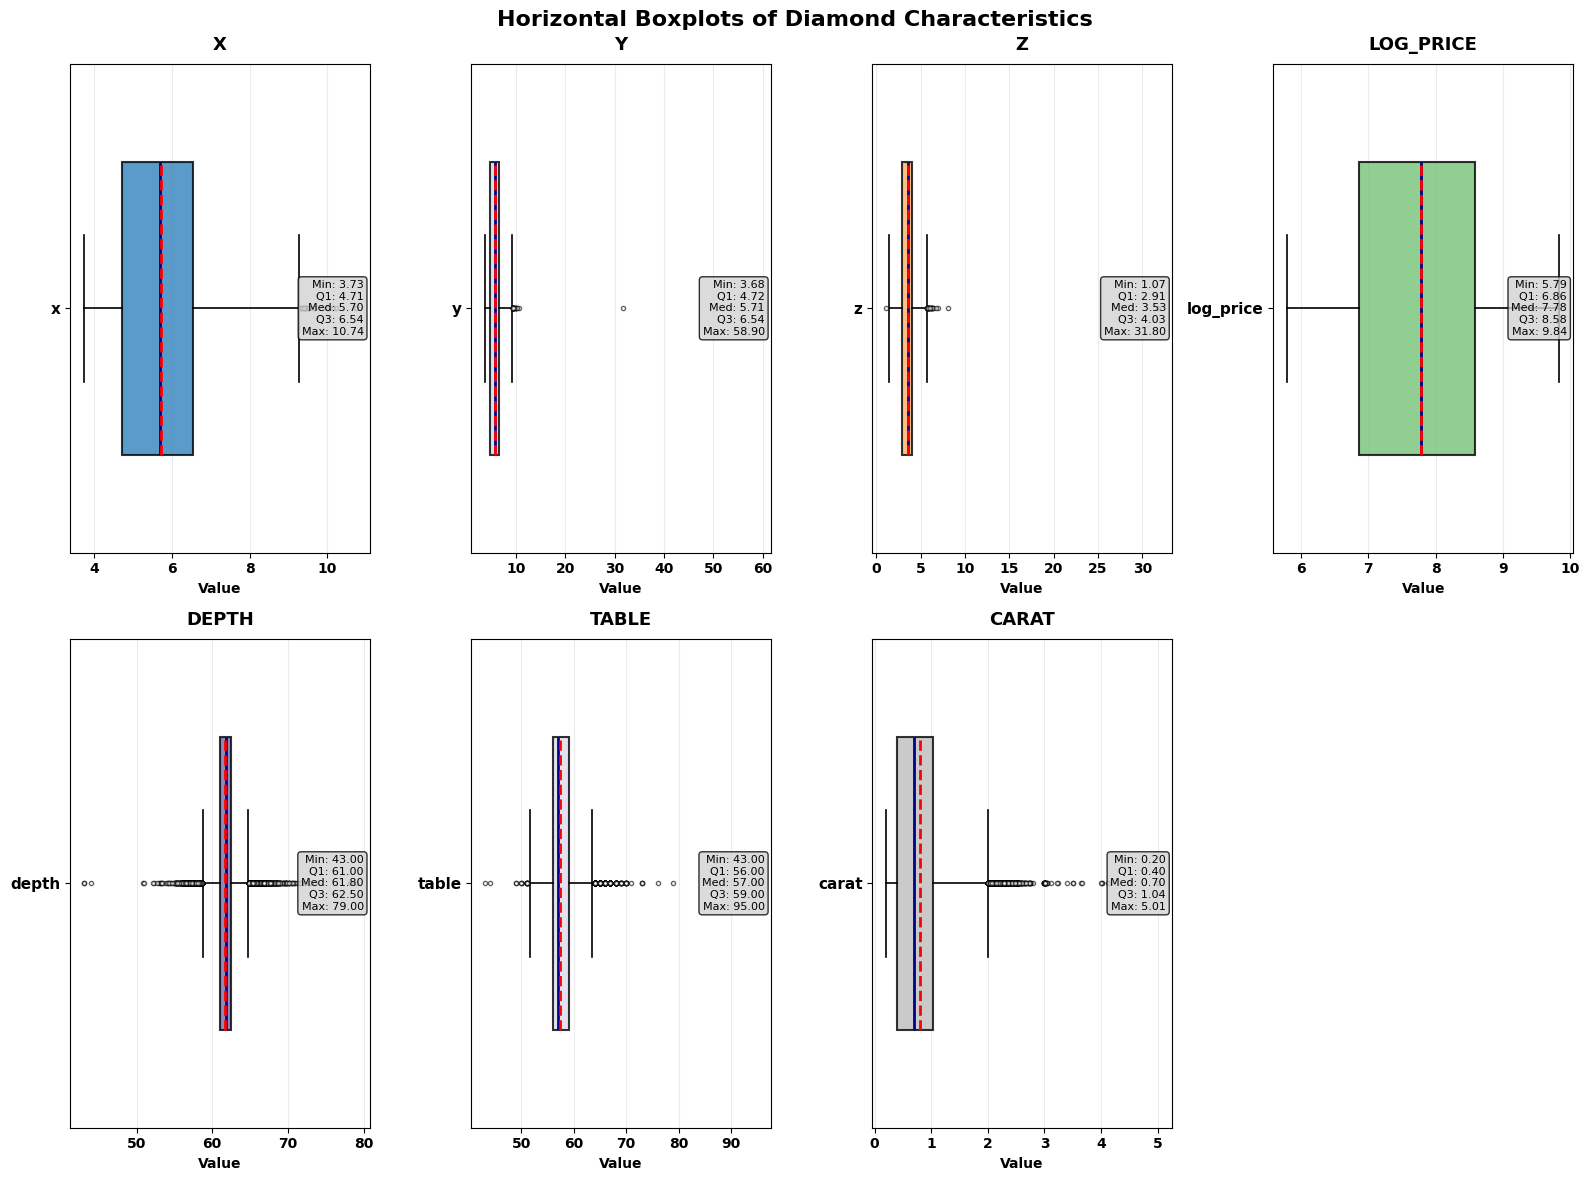

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Variables to plot
univ_num = ["x", "y", "z", "log_price", "depth", "table", "carat"]



# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
axes = axes.flatten()

# Get colormap
cmap = plt.get_cmap("tab20c")

# Plot each variable
for i, (ax, col) in enumerate(zip(axes, univ_num)):
    data = df[col].dropna()
    
    # Create horizontal boxplot
    bp = ax.boxplot(
        data,
        vert=False,  # Horizontal
        patch_artist=True,
        showmeans=True,
        meanline=True,
        showfliers=True,
        widths=0.6
    )
    
    # Choose a unique color per column from tab20c
    color = cmap(i * 3)
    
    # Color box + lines
    for box in bp["boxes"]:
        box.set(facecolor=color, edgecolor="black", linewidth=1.5, alpha=0.8)
    
    for whisker in bp["whiskers"]:
        whisker.set(color="black", linewidth=1.2)
    
    for cap in bp["caps"]:
        cap.set(color="black", linewidth=1.2)
    
    for median in bp["medians"]:
        median.set(color="darkblue", linewidth=2)
    
    # Mean line style
    for mean in bp["means"]:
        mean.set(color="red", linewidth=2, linestyle='--')
    
    # Outliers style
    for flier in bp["fliers"]:
        flier.set(marker="o", markersize=3, markerfacecolor="white",
                  markeredgecolor="black", alpha=0.6)
    
    # Customize subplot
    ax.set_title(f"{col.upper()}", fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Value", fontsize=10, fontweight="bold")
    ax.set_yticks([1])
    ax.set_yticklabels([col], fontsize=11, fontweight="bold")
    
    # Customize tick labels
    ax.tick_params(axis="x", labelsize=10)
    for t in ax.get_xticklabels():
        t.set_fontweight("bold")
    
    # Add grid
    ax.grid(axis="x", alpha=0.25)
    ax.set_axisbelow(True)
    
    # Add statistics text (vertical on the right)
    stats_text = f"Min: {data.min():.2f}\nQ1: {data.quantile(0.25):.2f}\nMed: {data.median():.2f}\nQ3: {data.quantile(0.75):.2f}\nMax: {data.max():.2f}"
    ax.text(0.98, 0.5, stats_text,
            transform=ax.transAxes,
            fontsize=8,
            verticalalignment='center',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Hide the last empty subplot (8th subplot for 7 variables)
axes[7].set_visible(False)

# Add overall title
fig.suptitle("Horizontal Boxplots of Diamond Characteristics", 
             fontsize=16, fontweight="bold", y=0.98)

plt.tight_layout()
plt.show()

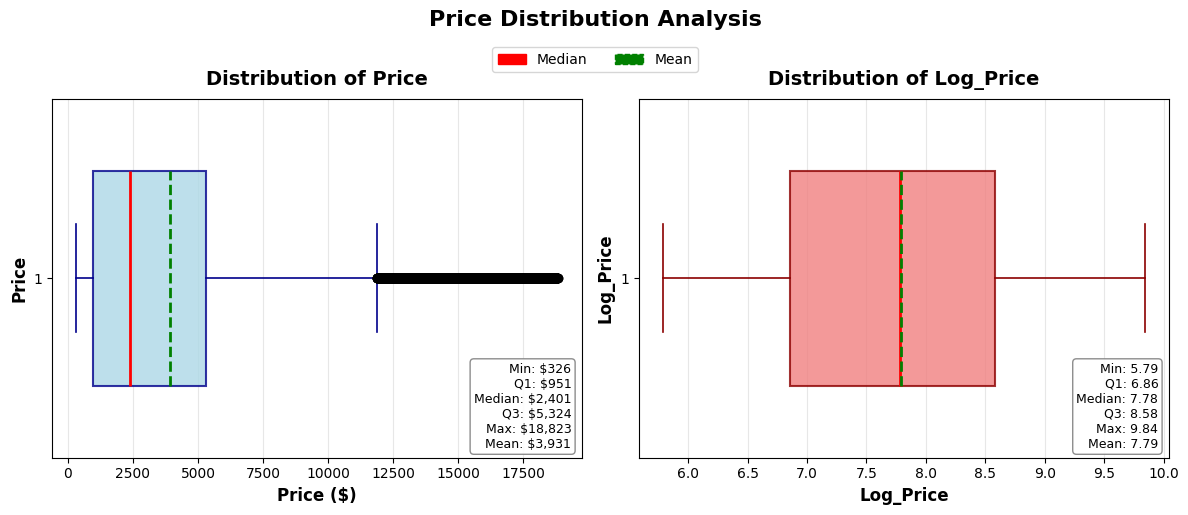

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create log_price column if it doesn't exist
if 'log_price' not in df.columns:
    df['log_price'] = np.log1p(df['price'])

# 1. Price boxplot
bp1 = axes[0].boxplot(
    df['price'].dropna(),
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    showfliers=True,
    widths=0.6
)

# Style price boxplot
for box in bp1["boxes"]:
    box.set(facecolor='lightblue', edgecolor='darkblue', linewidth=1.5, alpha=0.8)

for whisker in bp1["whiskers"]:
    whisker.set(color='darkblue', linewidth=1.2)

for cap in bp1["caps"]:
    cap.set(color='darkblue', linewidth=1.2)

for median in bp1["medians"]:
    median.set(color='red', linewidth=2)

for mean in bp1["means"]:
    mean.set(color='green', linewidth=2, linestyle='--')

# 2. Log Price boxplot
bp2 = axes[1].boxplot(
    df['log_price'].dropna(),
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    showfliers=True,
    widths=0.6
)

# Style log price boxplot
for box in bp2["boxes"]:
    box.set(facecolor='lightcoral', edgecolor='darkred', linewidth=1.5, alpha=0.8)

for whisker in bp2["whiskers"]:
    whisker.set(color='darkred', linewidth=1.2)

for cap in bp2["caps"]:
    cap.set(color='darkred', linewidth=1.2)

for median in bp2["medians"]:
    median.set(color='red', linewidth=2)

for mean in bp2["means"]:
    mean.set(color='green', linewidth=2, linestyle='--')

# Customize subplots
axes[0].set_title("Distribution of Price", fontsize=14, fontweight='bold', pad=10)
axes[0].set_xlabel("Price ($)", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Price", fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_axisbelow(True)

axes[1].set_title("Distribution of Log_Price", fontsize=14, fontweight='bold', pad=10)
axes[1].set_xlabel("Log_Price", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Log_Price", fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_axisbelow(True)

# Add overall title
fig.suptitle("Price Distribution Analysis", fontsize=16, fontweight='bold', y=1.02)

# Add statistics annotations
price_stats = f"Min: ${df['price'].min():,.0f}\n"
price_stats += f"Q1: ${df['price'].quantile(0.25):,.0f}\n"
price_stats += f"Median: ${df['price'].median():,.0f}\n"
price_stats += f"Q3: ${df['price'].quantile(0.75):,.0f}\n"
price_stats += f"Max: ${df['price'].max():,.0f}\n"
price_stats += f"Mean: ${df['price'].mean():,.0f}"

log_stats = f"Min: {df['log_price'].min():.2f}\n"
log_stats += f"Q1: {df['log_price'].quantile(0.25):.2f}\n"
log_stats += f"Median: {df['log_price'].median():.2f}\n"
log_stats += f"Q3: {df['log_price'].quantile(0.75):.2f}\n"
log_stats += f"Max: {df['log_price'].max():.2f}\n"
log_stats += f"Mean: {df['log_price'].mean():.2f}"

axes[0].text(0.98, 0.02, price_stats,
            transform=axes[0].transAxes,
            fontsize=9,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

axes[1].text(0.98, 0.02, log_stats,
            transform=axes[1].transAxes,
            fontsize=9,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

# Add legend
import matplotlib.patches as mpatches
median_patch = mpatches.Patch(color='red', label='Median')
mean_patch = mpatches.Patch(color='green', label='Mean', linestyle='--')
fig.legend(handles=[median_patch, mean_patch], 
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.96),
           ncol=2, 
           fontsize=10)

plt.tight_layout()
plt.show()

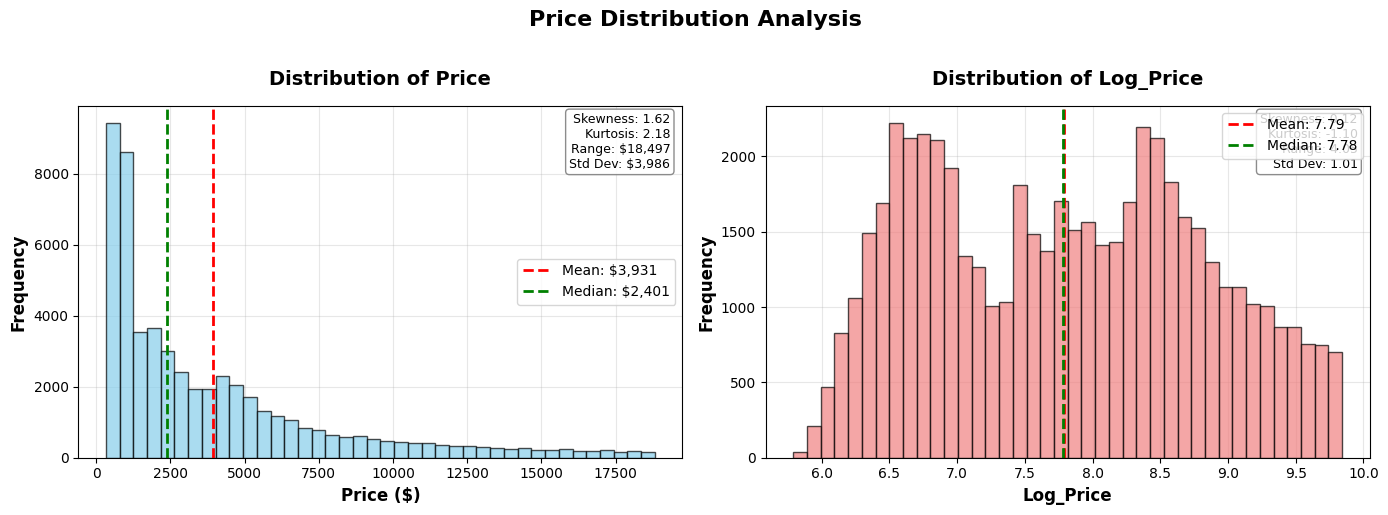

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Create log_price column if it doesn't exist
if 'log_price' not in df.columns:
    df['log_price'] = np.log1p(df['price'])

# 1. Price Histogram
axes[0].hist(df['price'], bins=40, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: ${df["price"].mean():,.0f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: ${df["price"].median():,.0f}')
axes[0].set_xlabel('Price ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Price', fontsize=14, fontweight='bold', pad=15)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_axisbelow(True)

# 2. Log Price Histogram
axes[1].hist(df['log_price'], bins=40, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].axvline(df['log_price'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {df["log_price"].mean():.2f}')
axes[1].axvline(df['log_price'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {df["log_price"].median():.2f}')
axes[1].set_xlabel('Log_Price', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Log_Price', fontsize=14, fontweight='bold', pad=15)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_axisbelow(True)

# Add overall title
fig.suptitle('Price Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

# Add statistics annotations
price_stats = f"Skewness: {df['price'].skew():.2f}\n"
price_stats += f"Kurtosis: {df['price'].kurtosis():.2f}\n"
price_stats += f"Range: ${df['price'].max()-df['price'].min():,.0f}\n"
price_stats += f"Std Dev: ${df['price'].std():,.0f}"

log_stats = f"Skewness: {df['log_price'].skew():.2f}\n"
log_stats += f"Kurtosis: {df['log_price'].kurtosis():.2f}\n"
log_stats += f"Range: {df['log_price'].max()-df['log_price'].min():.2f}\n"
log_stats += f"Std Dev: {df['log_price'].std():.2f}"

axes[0].text(0.98, 0.98, price_stats,
            transform=axes[0].transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

axes[1].text(0.98, 0.98, log_stats,
            transform=axes[1].transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()

C:\Users\Visal\AppData\Local\Temp\ipykernel_13528\2362453617.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 0].set_xticklabels(labels, fontsize=9, fontweight='bold', rotation=45)
C:\Users\Visal\AppData\Local\Temp\ipykernel_13528\2362453617.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 0].set_xticklabels(labels, fontsize=9, fontweight='bold', rotation=45)
C:\Users\Visal\AppData\Local\Temp\ipykernel_13528\2362453617.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 0].set_xticklabels(labels, fontsize=9, fontweight='bold', rotation=45)


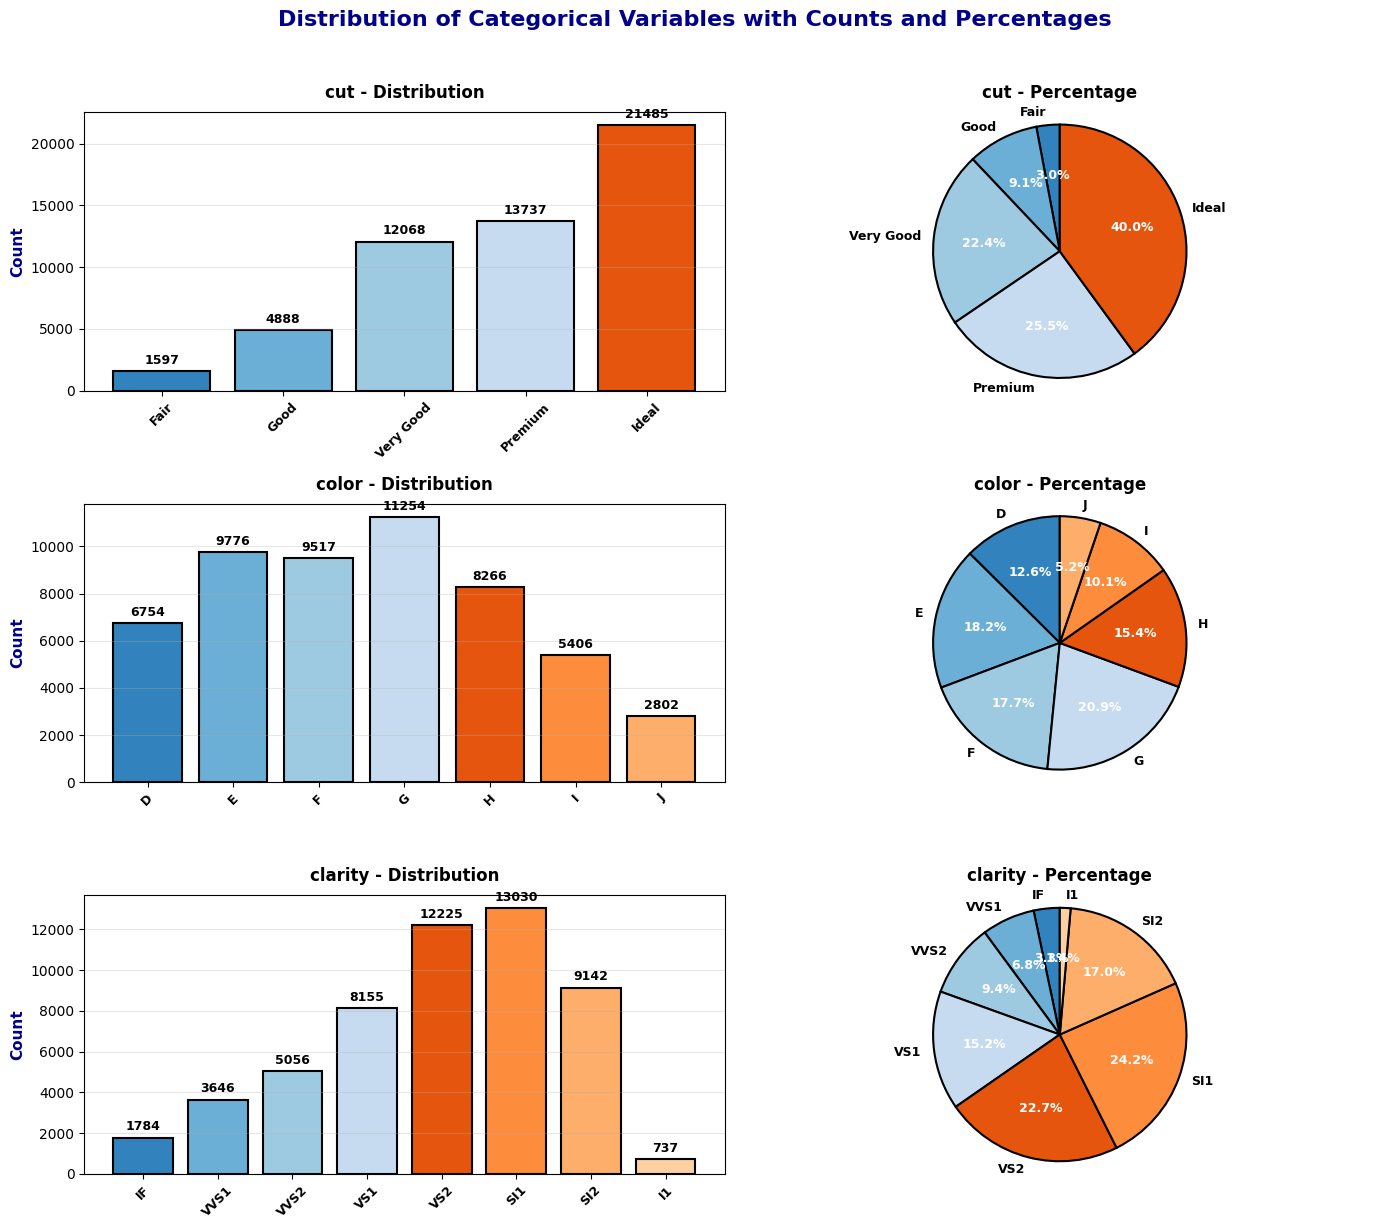

In [22]:
# Create a figure with 3 rows (one for each categorical variable) and 2 columns (bar + pie)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution of Categorical Variables with Counts and Percentages', 
             fontsize=16, y=1.02, fontweight='bold', color='darkblue')

# Define the autolabel function
def autolabel(rects, ax):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    weight='bold', size=9, color='black')

# Plot each categorical variable
for row, col in enumerate(categorical_cols):
    # Get value counts
    df_plot = df[col].value_counts().to_frame()
    
    # Order the categories appropriately
    if col == 'cut':
        order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
        df_plot = df_plot.reindex([c for c in order if c in df_plot.index])
    elif col == 'color':
        order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
        df_plot = df_plot.reindex([c for c in order if c in df_plot.index])
    elif col == 'clarity':
        order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
        df_plot = df_plot.reindex([c for c in order if c in df_plot.index])
    
    # Get values and labels
    values = df_plot.iloc[:, 0]
    labels = df_plot.index.to_list()
    
    # Generate colors
    cmap = plt.get_cmap('tab20c')
    colors = cmap(np.arange(len(labels)))
    
    # BAR CHART (left column)
    rects = axes[row, 0].bar(labels, values, color=colors, 
                             edgecolor='black', linewidth=1.5)
    axes[row, 0].set_ylabel('Count', fontsize=11, fontweight='bold', color='darkblue')
    axes[row, 0].set_xticklabels(labels, fontsize=9, fontweight='bold', rotation=45)
    axes[row, 0].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold', pad=10)
    axes[row, 0].grid(True, alpha=0.3, axis='y')
    
    # Add labels to bars
    autolabel(rects, axes[row, 0])
    
    # PIE CHART (right column)
    wedges, texts, autotexts = axes[row, 1].pie(values, labels=labels, startangle=90,
                                                autopct='%1.1f%%', colors=colors,
                                                wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'},
                                                textprops={'color': 'black', 'weight': 'bold', 'fontsize': 9})
    
    # Make percentage text white for better contrast on dark colors
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
    
    axes[row, 1].axis('equal')
    axes[row, 1].set_title(f'{col} - Percentage', fontsize=12, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

2) Bivariate Analysis

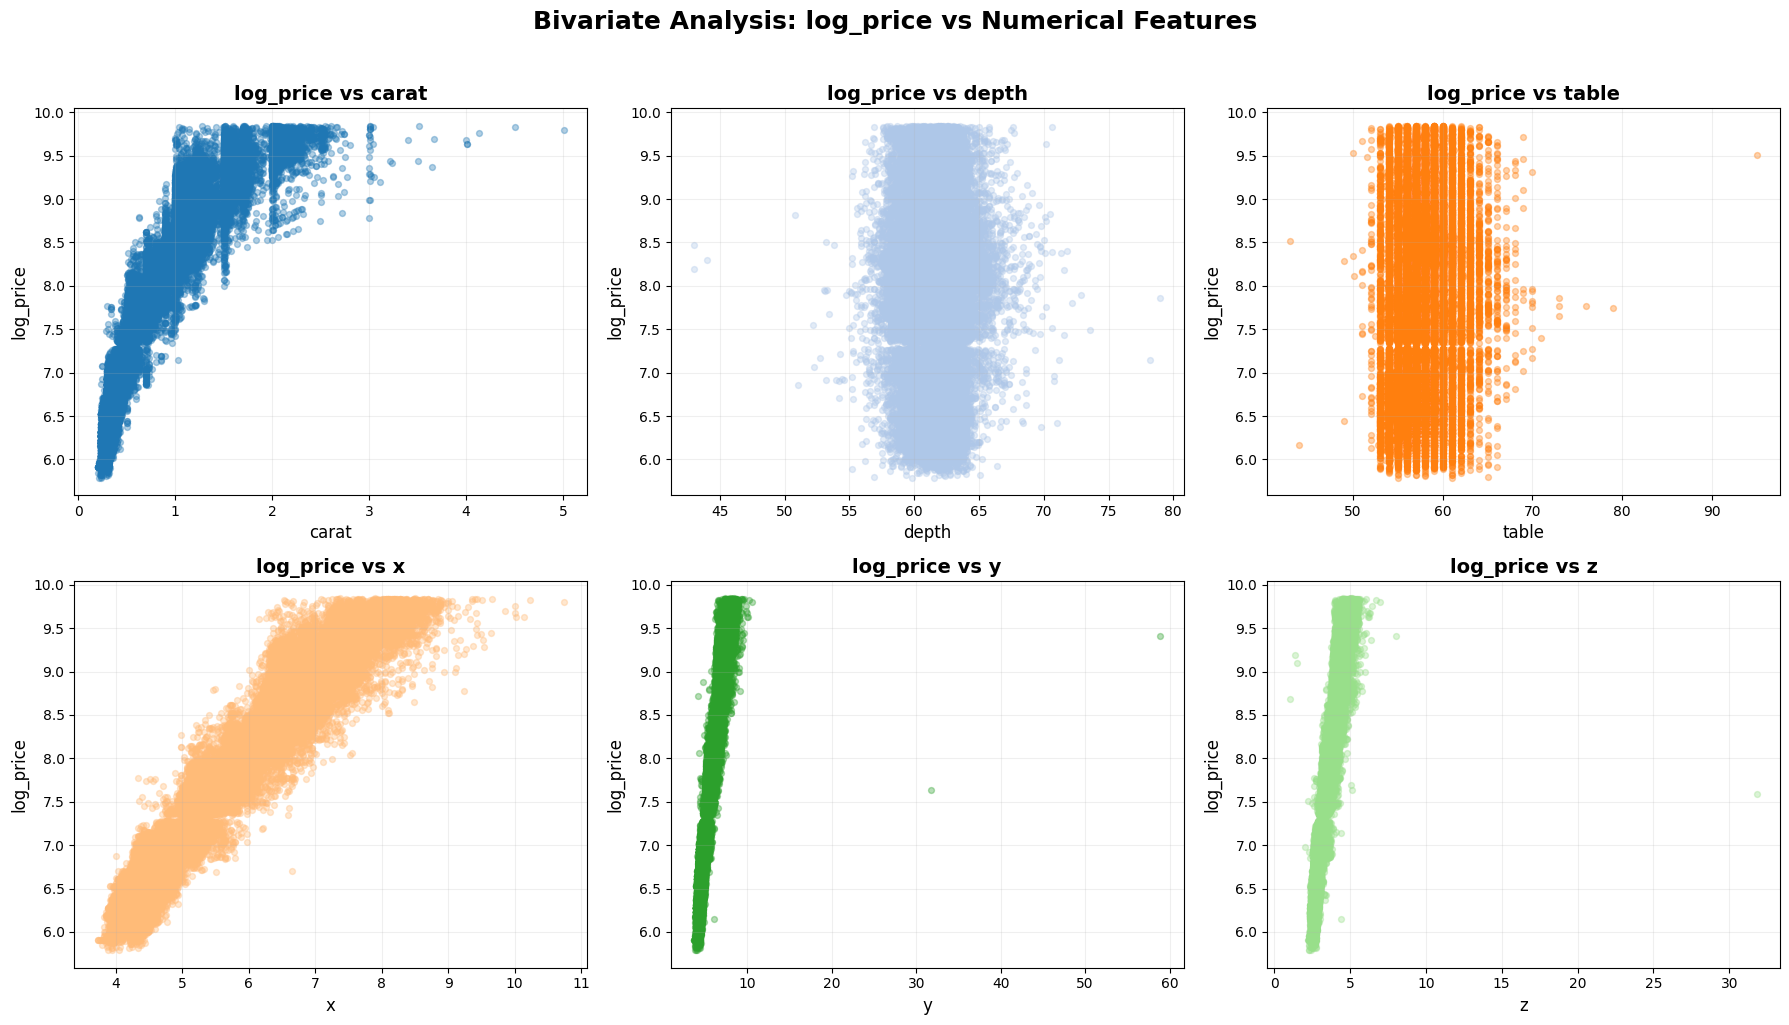

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------- data ----------------
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["log_price", "price"]]

# Take only first 6 variables for 2x3 layout
num_cols = num_cols[:6]

# ---------------- colors ----------------
colors = plt.cm.tab20.colors  # tab20 palette

# ---------------- plot ----------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].scatter(
        df[col],
        df["log_price"],
        s=18,
        alpha=0.35,
        color=colors[i]
    )
    axes[i].set_title(f"log_price vs {col}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("log_price", fontsize=12)
    axes[i].grid(True, alpha=0.2)

# Remove unused axes if any
for j in range(len(num_cols), 6):
    fig.delaxes(axes[j])

# ---------------- main title ----------------
fig.suptitle(
    "Bivariate Analysis: log_price vs Numerical Features",
    fontsize=18,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.show()


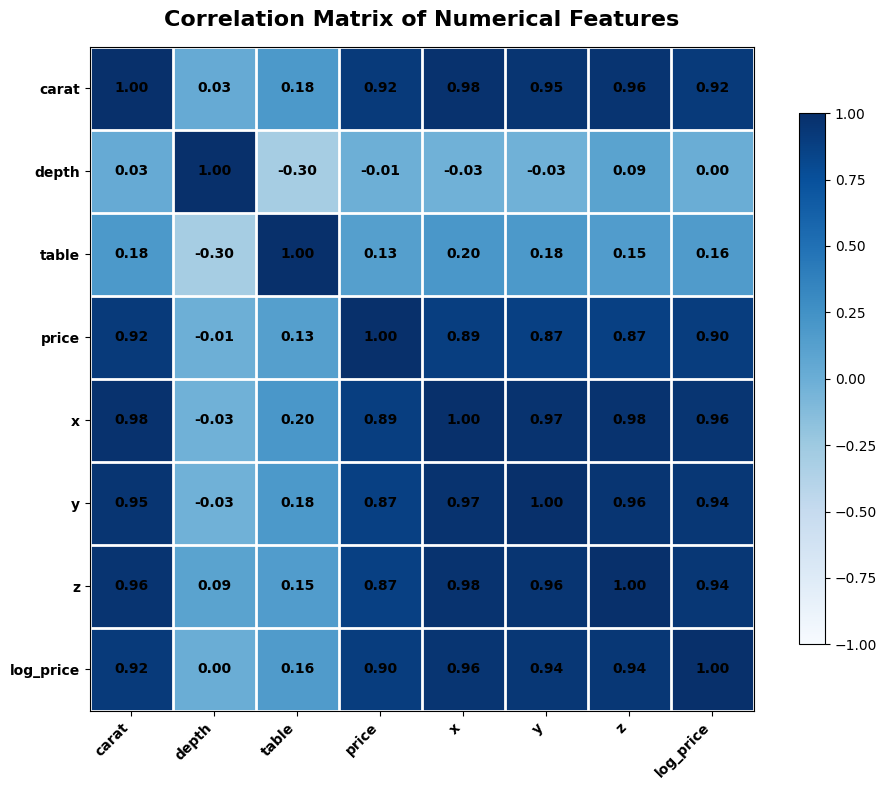

In [24]:
import numpy as np
import matplotlib.pyplot as plt

cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price']
corr = df[cols].corr()

fig, ax = plt.subplots(figsize=(10, 8), facecolor="white")

# heatmap
im = ax.imshow(corr.values, cmap="Blues", vmin=-1, vmax=1)

# ticks & labels
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, fontweight="bold", rotation=45, ha="right")
ax.set_yticklabels(cols, fontweight="bold")

# add grid lines to look like squares
ax.set_xticks(np.arange(-.5, len(cols), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(cols), 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

# annotate values
for i in range(len(cols)):
    for j in range(len(cols)):
        val = corr.values[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            fontweight="bold",
            fontsize=10,
            color="black"
        )

# colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.tick_params(labelsize=10)

ax.set_title("Correlation Matrix of Numerical Features", fontsize=16, fontweight="bold", pad=15)

plt.tight_layout()
plt.show()


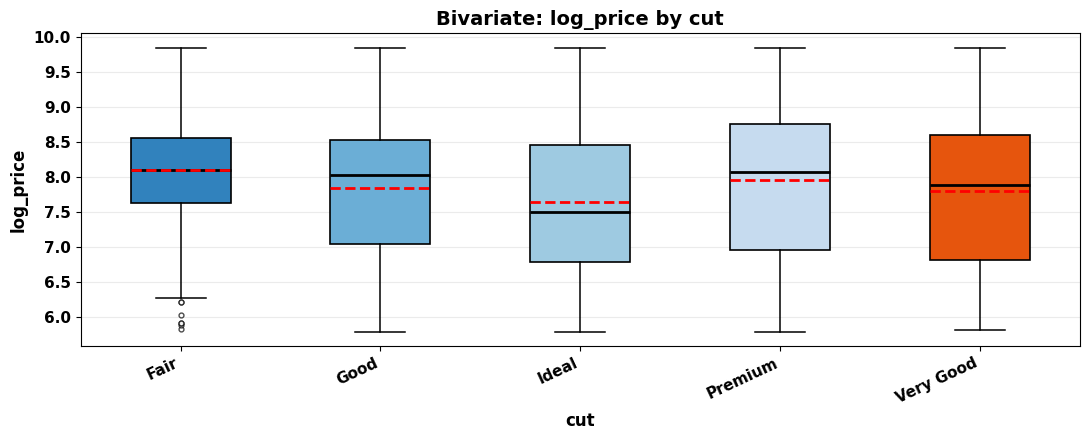

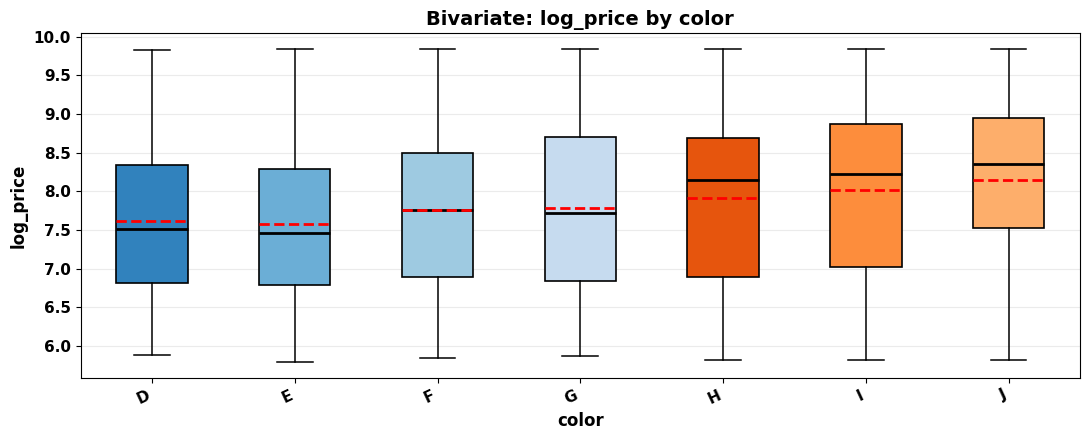

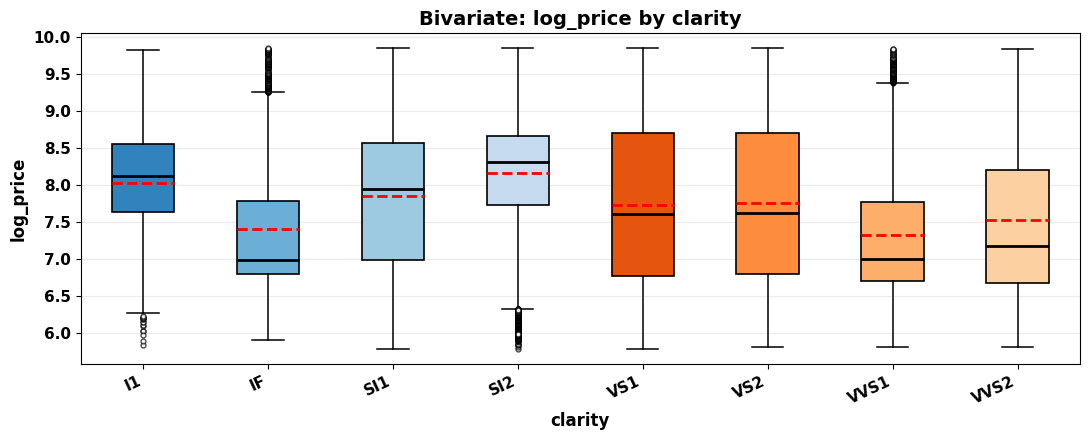

In [25]:
import matplotlib.pyplot as plt

targets = ["cut", "color", "clarity"]
targets = [c for c in targets if c in df.columns]

cmap = plt.get_cmap("tab20c")

for k, col in enumerate(targets):
    # Keep only needed columns + drop missing
    tmp = df[[col, "log_price"]].dropna()

    # Sort categories (nice order)
    cats = sorted(tmp[col].unique())
    data = [tmp.loc[tmp[col] == cat, "log_price"].values for cat in cats]

    fig, ax = plt.subplots(figsize=(11, 4.5), facecolor="white")

    bp = ax.boxplot(
        data,
        patch_artist=True,
        showmeans=True,
        meanline=True,
        showfliers=True
    )

    # Color each category with tab20c
    for i, box in enumerate(bp["boxes"]):
        box.set(facecolor=cmap(i), edgecolor="black", linewidth=1.2)

    for median in bp["medians"]:
        median.set(color="black", linewidth=2)

    for mean in bp["means"]:
        mean.set(color="red", linewidth=2)

    for whisker in bp["whiskers"]:
        whisker.set(color="black", linewidth=1.1)

    for cap in bp["caps"]:
        cap.set(color="black", linewidth=1.1)

    for flier in bp["fliers"]:
        flier.set(marker="o", markersize=3.5, markerfacecolor="white",
                  markeredgecolor="black", alpha=0.7)

    ax.set_title(f"Bivariate: log_price by {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=12, fontweight="bold")
    ax.set_ylabel("log_price", fontsize=12, fontweight="bold")

    ax.set_xticks(range(1, len(cats) + 1))
    ax.set_xticklabels(cats, rotation=25, ha="right", fontsize=11, fontweight="bold")

    ax.tick_params(axis="y", labelsize=11)
    for t in ax.get_yticklabels():
        t.set_fontweight("bold")

    ax.grid(axis="y", alpha=0.25)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()


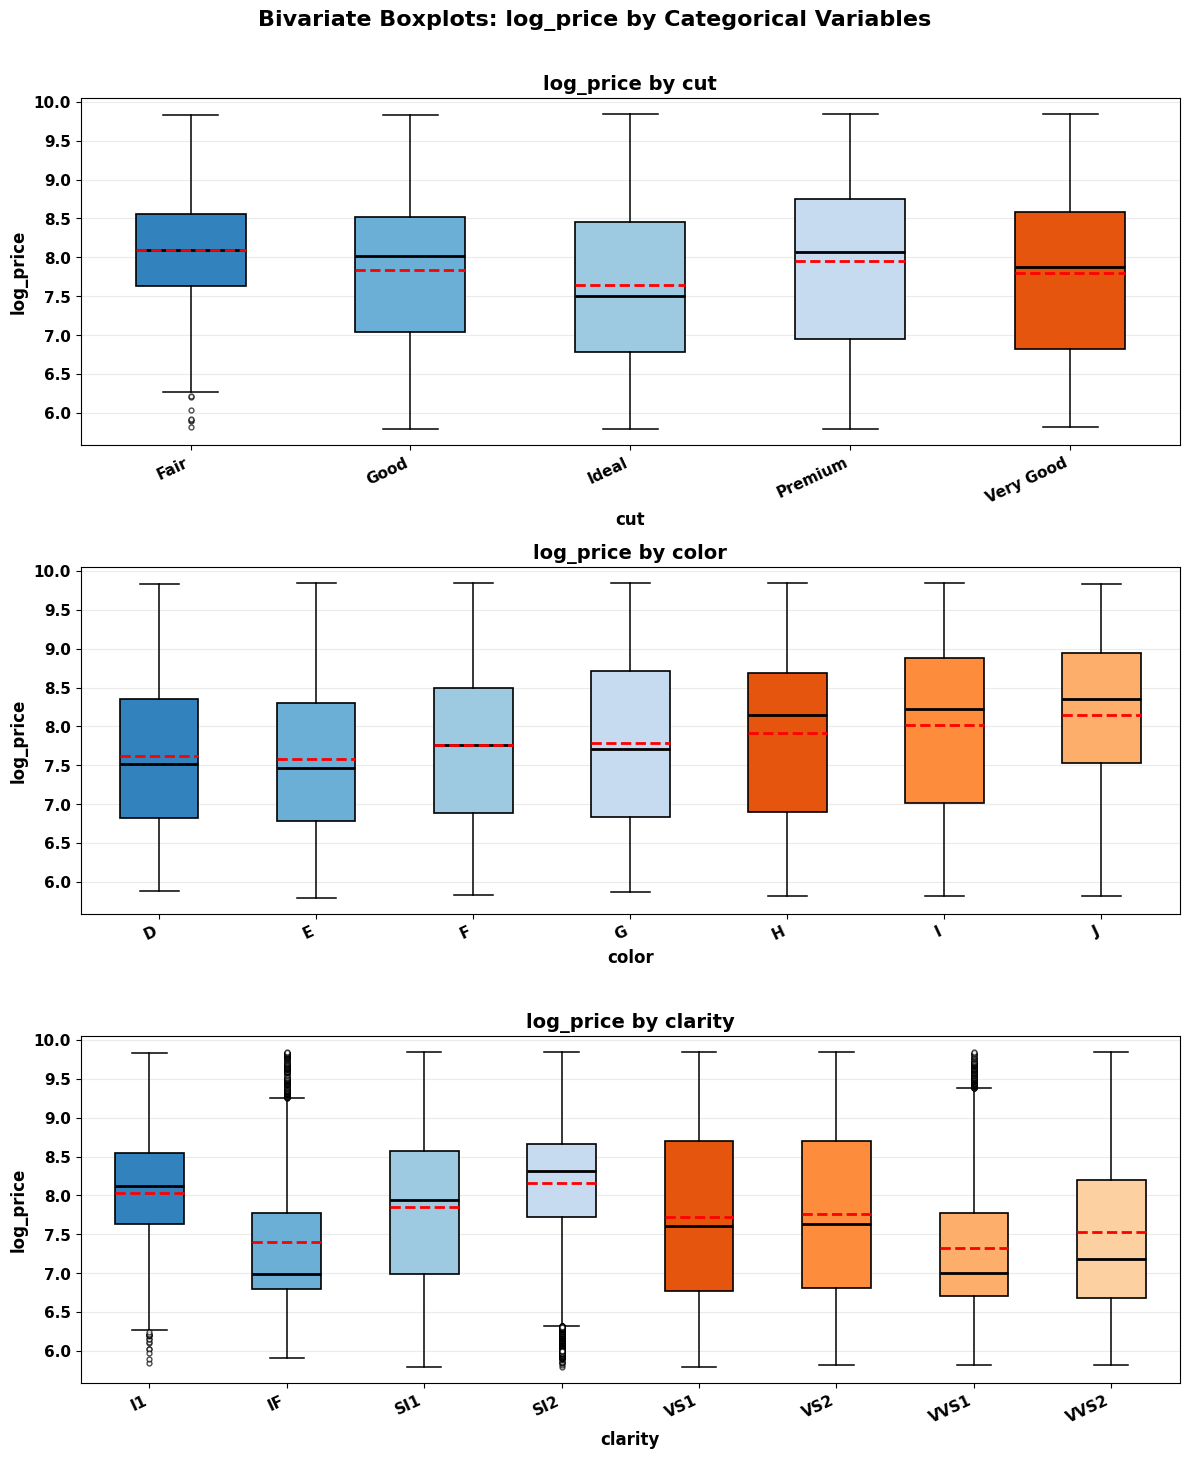

In [26]:
import matplotlib.pyplot as plt

targets = ["cut", "color", "clarity"]
targets = [c for c in targets if c in df.columns]

cmap = plt.get_cmap("tab20c")

# ✅ One figure, multiple subplots
fig, axes = plt.subplots(
    nrows=len(targets), ncols=1,
    figsize=(12, 4.8 * len(targets)),
    facecolor="white"
)

# If only 1 target exists, axes is not a list -> make it a list
if len(targets) == 1:
    axes = [axes]

for ax, col in zip(axes, targets):
    tmp = df[[col, "log_price"]].dropna()

    # Sort categories
    cats = sorted(tmp[col].unique())
    data = [tmp.loc[tmp[col] == cat, "log_price"].values for cat in cats]

    bp = ax.boxplot(
        data,
        patch_artist=True,
        showmeans=True,
        meanline=True,
        showfliers=True
    )

    # Color each category
    for i, box in enumerate(bp["boxes"]):
        box.set(facecolor=cmap(i), edgecolor="black", linewidth=1.2)

    for median in bp["medians"]:
        median.set(color="black", linewidth=2)

    for mean in bp["means"]:
        mean.set(color="red", linewidth=2)

    for whisker in bp["whiskers"]:
        whisker.set(color="black", linewidth=1.1)

    for cap in bp["caps"]:
        cap.set(color="black", linewidth=1.1)

    for flier in bp["fliers"]:
        flier.set(marker="o", markersize=3.5, markerfacecolor="white",
                  markeredgecolor="black", alpha=0.7)

    ax.set_title(f"log_price by {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=12, fontweight="bold")
    ax.set_ylabel("log_price", fontsize=12, fontweight="bold")

    ax.set_xticks(range(1, len(cats) + 1))
    ax.set_xticklabels(cats, rotation=25, ha="right", fontsize=11, fontweight="bold")

    ax.tick_params(axis="y", labelsize=11)
    for t in ax.get_yticklabels():
        t.set_fontweight("bold")

    ax.grid(axis="y", alpha=0.25)
    ax.set_axisbelow(True)

fig.suptitle("Bivariate Boxplots: log_price by Categorical Variables",
             fontsize=16, fontweight="bold", y=1.01)

plt.tight_layout()
plt.show()


3) Multivariate Analysis

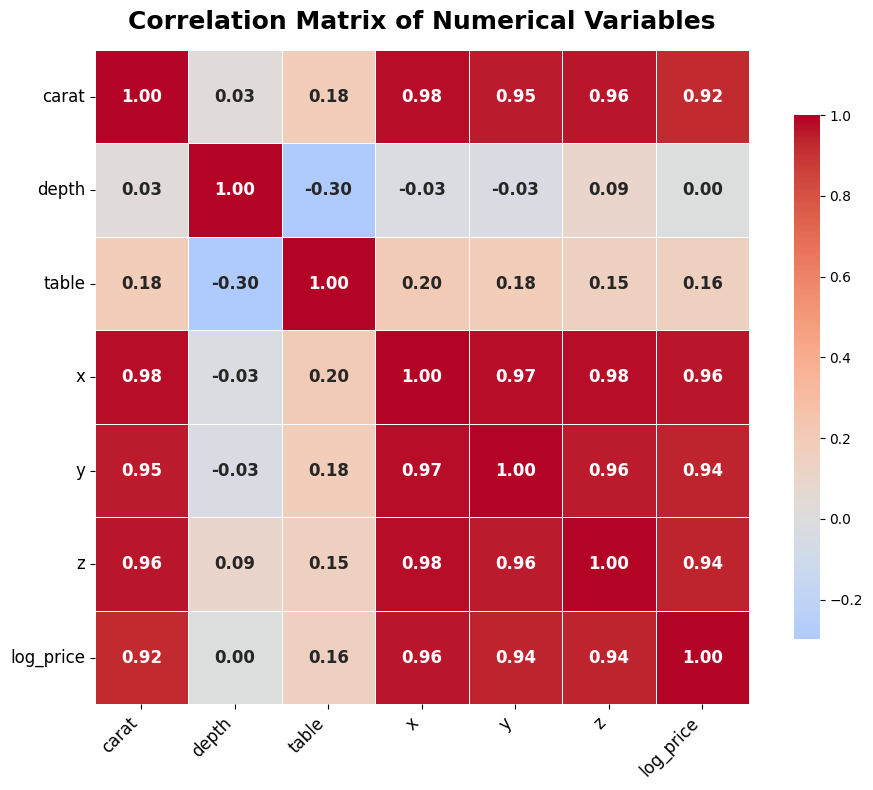

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------- data ----------------
use_cols = ["carat","depth","table","x","y","z","log_price"]
df = df[use_cols].dropna()

# ---------------- correlation matrix ----------------
corr = df.corr()

# ---------------- plot ----------------
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12, "weight": "bold"}
)

plt.title(
    "Correlation Matrix of Numerical Variables",
    fontsize=18,
    fontweight="bold",
    pad=15
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()


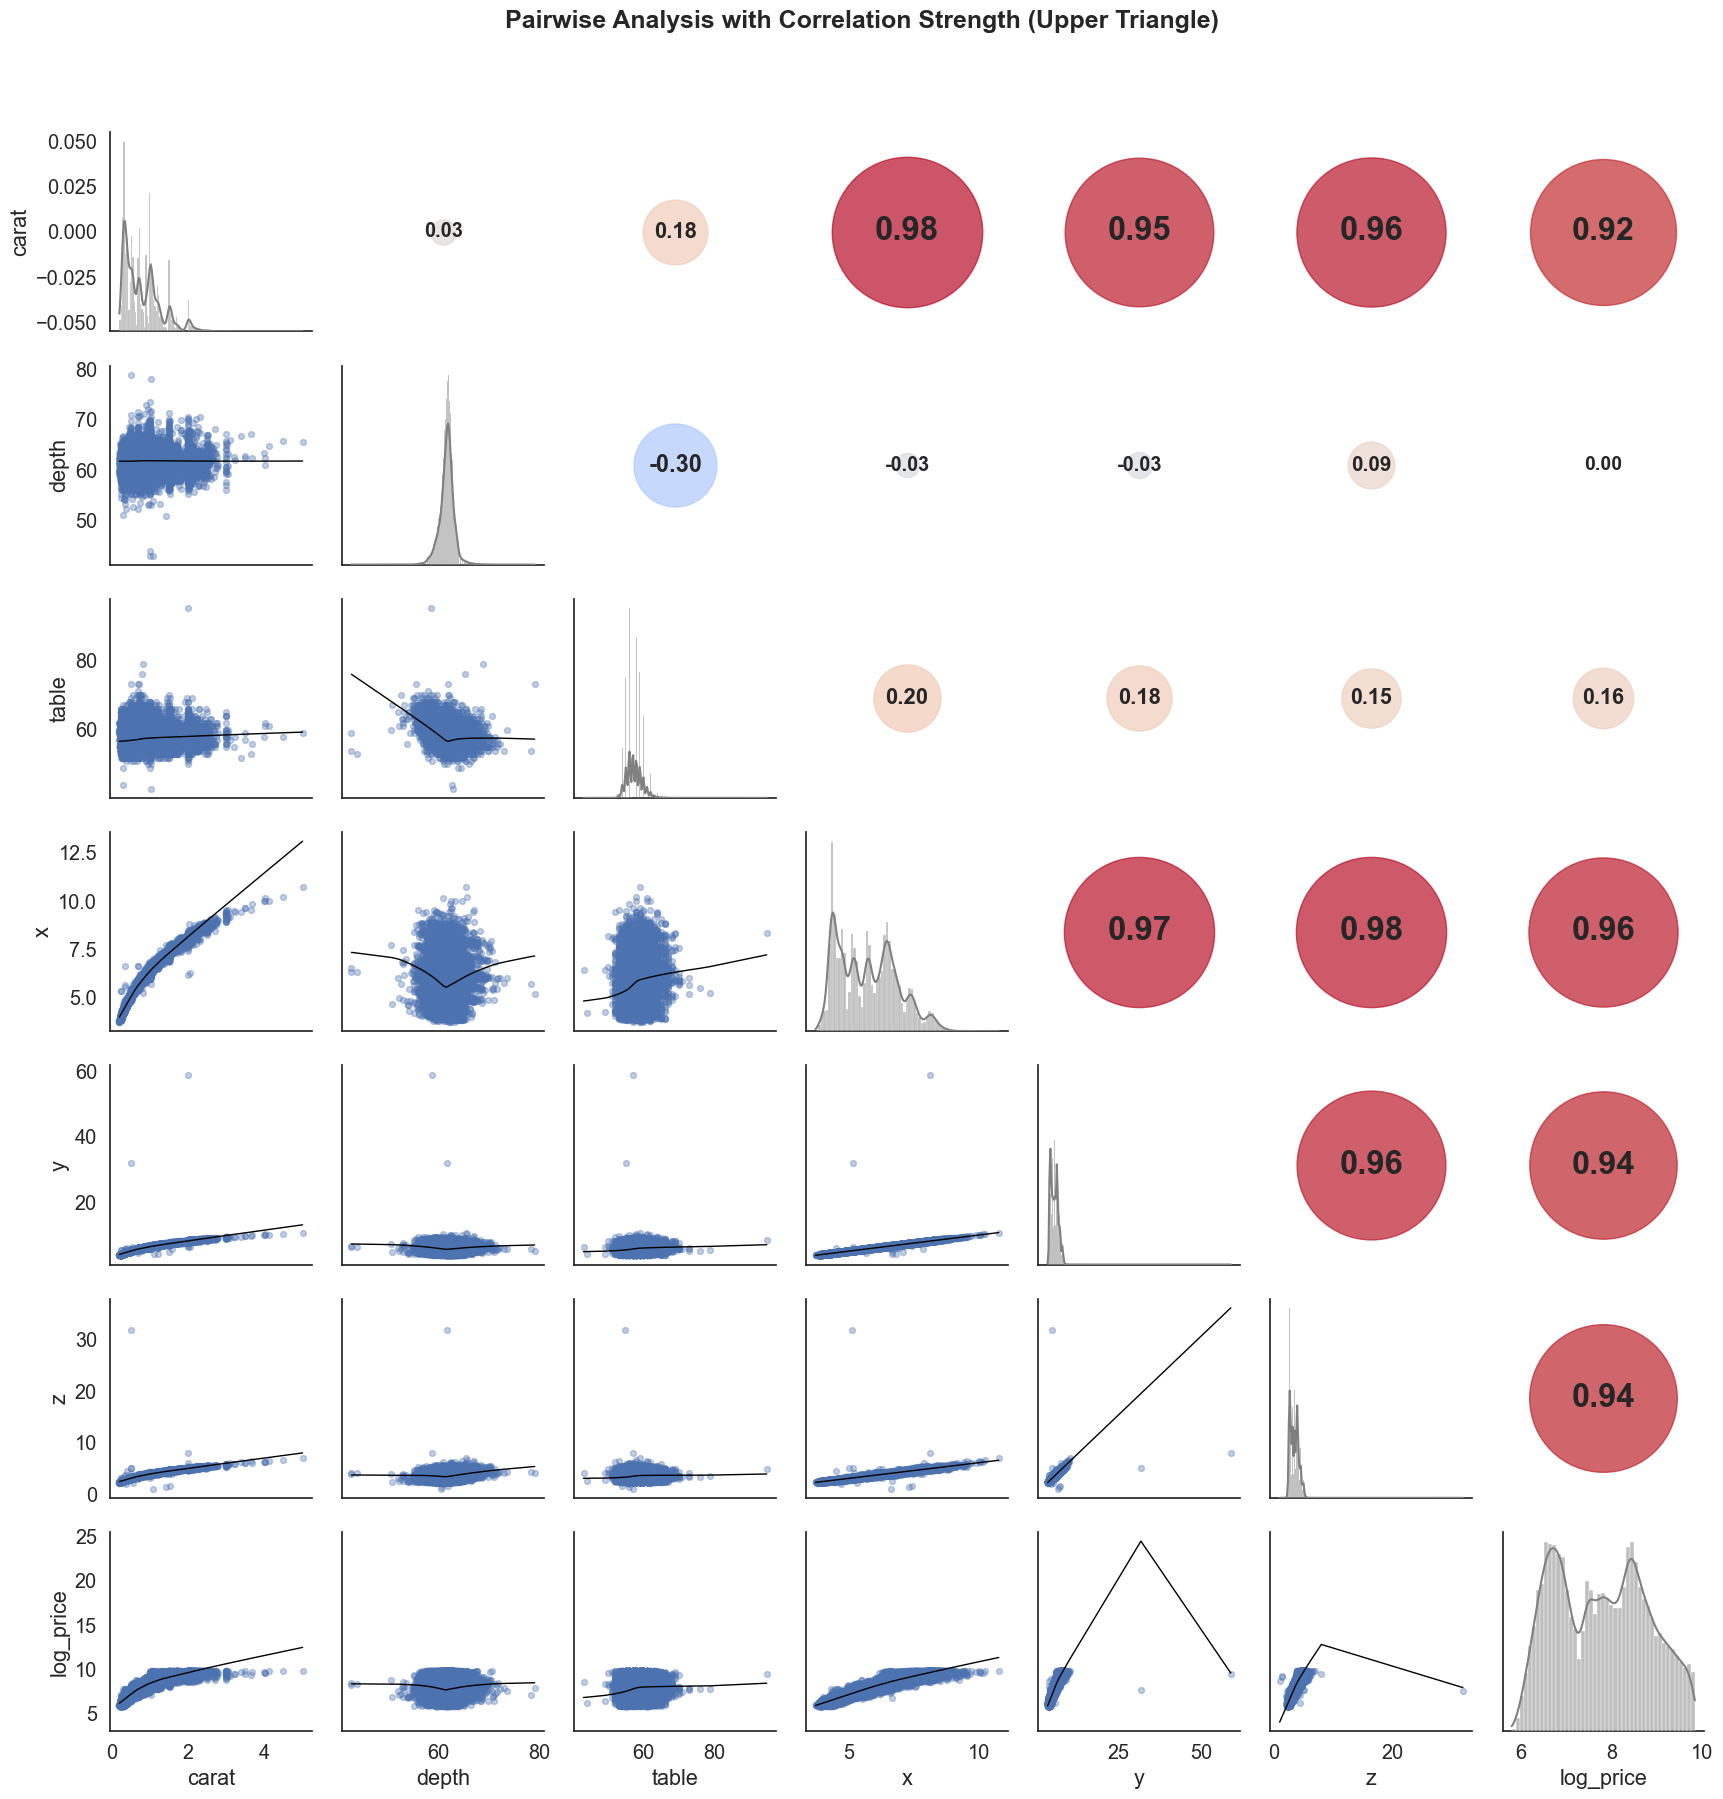

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---------------- data ----------------
use_cols = ["carat", "depth", "table", "x", "y", "z", "log_price"]
df = df[use_cols].dropna()

# ---------------- correlation dot ----------------
def corrdot(x, y, **kws):
    r = x.corr(y)
    ax = plt.gca()
    ax.set_axis_off()

    # Dot size proportional to |r|
    size = abs(r) * 12000

    ax.scatter(
        [0.5], [0.5],
        s=size,
        c=[r],
        cmap="coolwarm",
        vmin=-1, vmax=1,
        alpha=0.7,
        transform=ax.transAxes
    )

    ax.annotate(
        f"{r:.2f}",
        (0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=14 + abs(r) * 10,
        fontweight="bold"
    )

# ---------------- style ----------------
sns.set(style="white", font_scale=1.3)

# ---------------- PairGrid ----------------
g = sns.PairGrid(df, diag_sharey=False)

# Lower triangle → scatter + regression
g.map_lower(
    sns.regplot,
    lowess=True,
    scatter_kws={"s": 18, "alpha": 0.35},
    line_kws={"color": "black", "linewidth": 1}
)

# Diagonal → histogram + KDE
g.map_diag(
    sns.histplot,
    kde=True,
    color="gray"
)

# Upper triangle → correlation dots
g.map_upper(corrdot)

# ---------------- title ----------------
g.fig.suptitle(
    "Pairwise Analysis with Correlation Strength (Upper Triangle)",
    fontsize=18,
    fontweight="bold",
    y=1.03
)

plt.tight_layout()
plt.show()


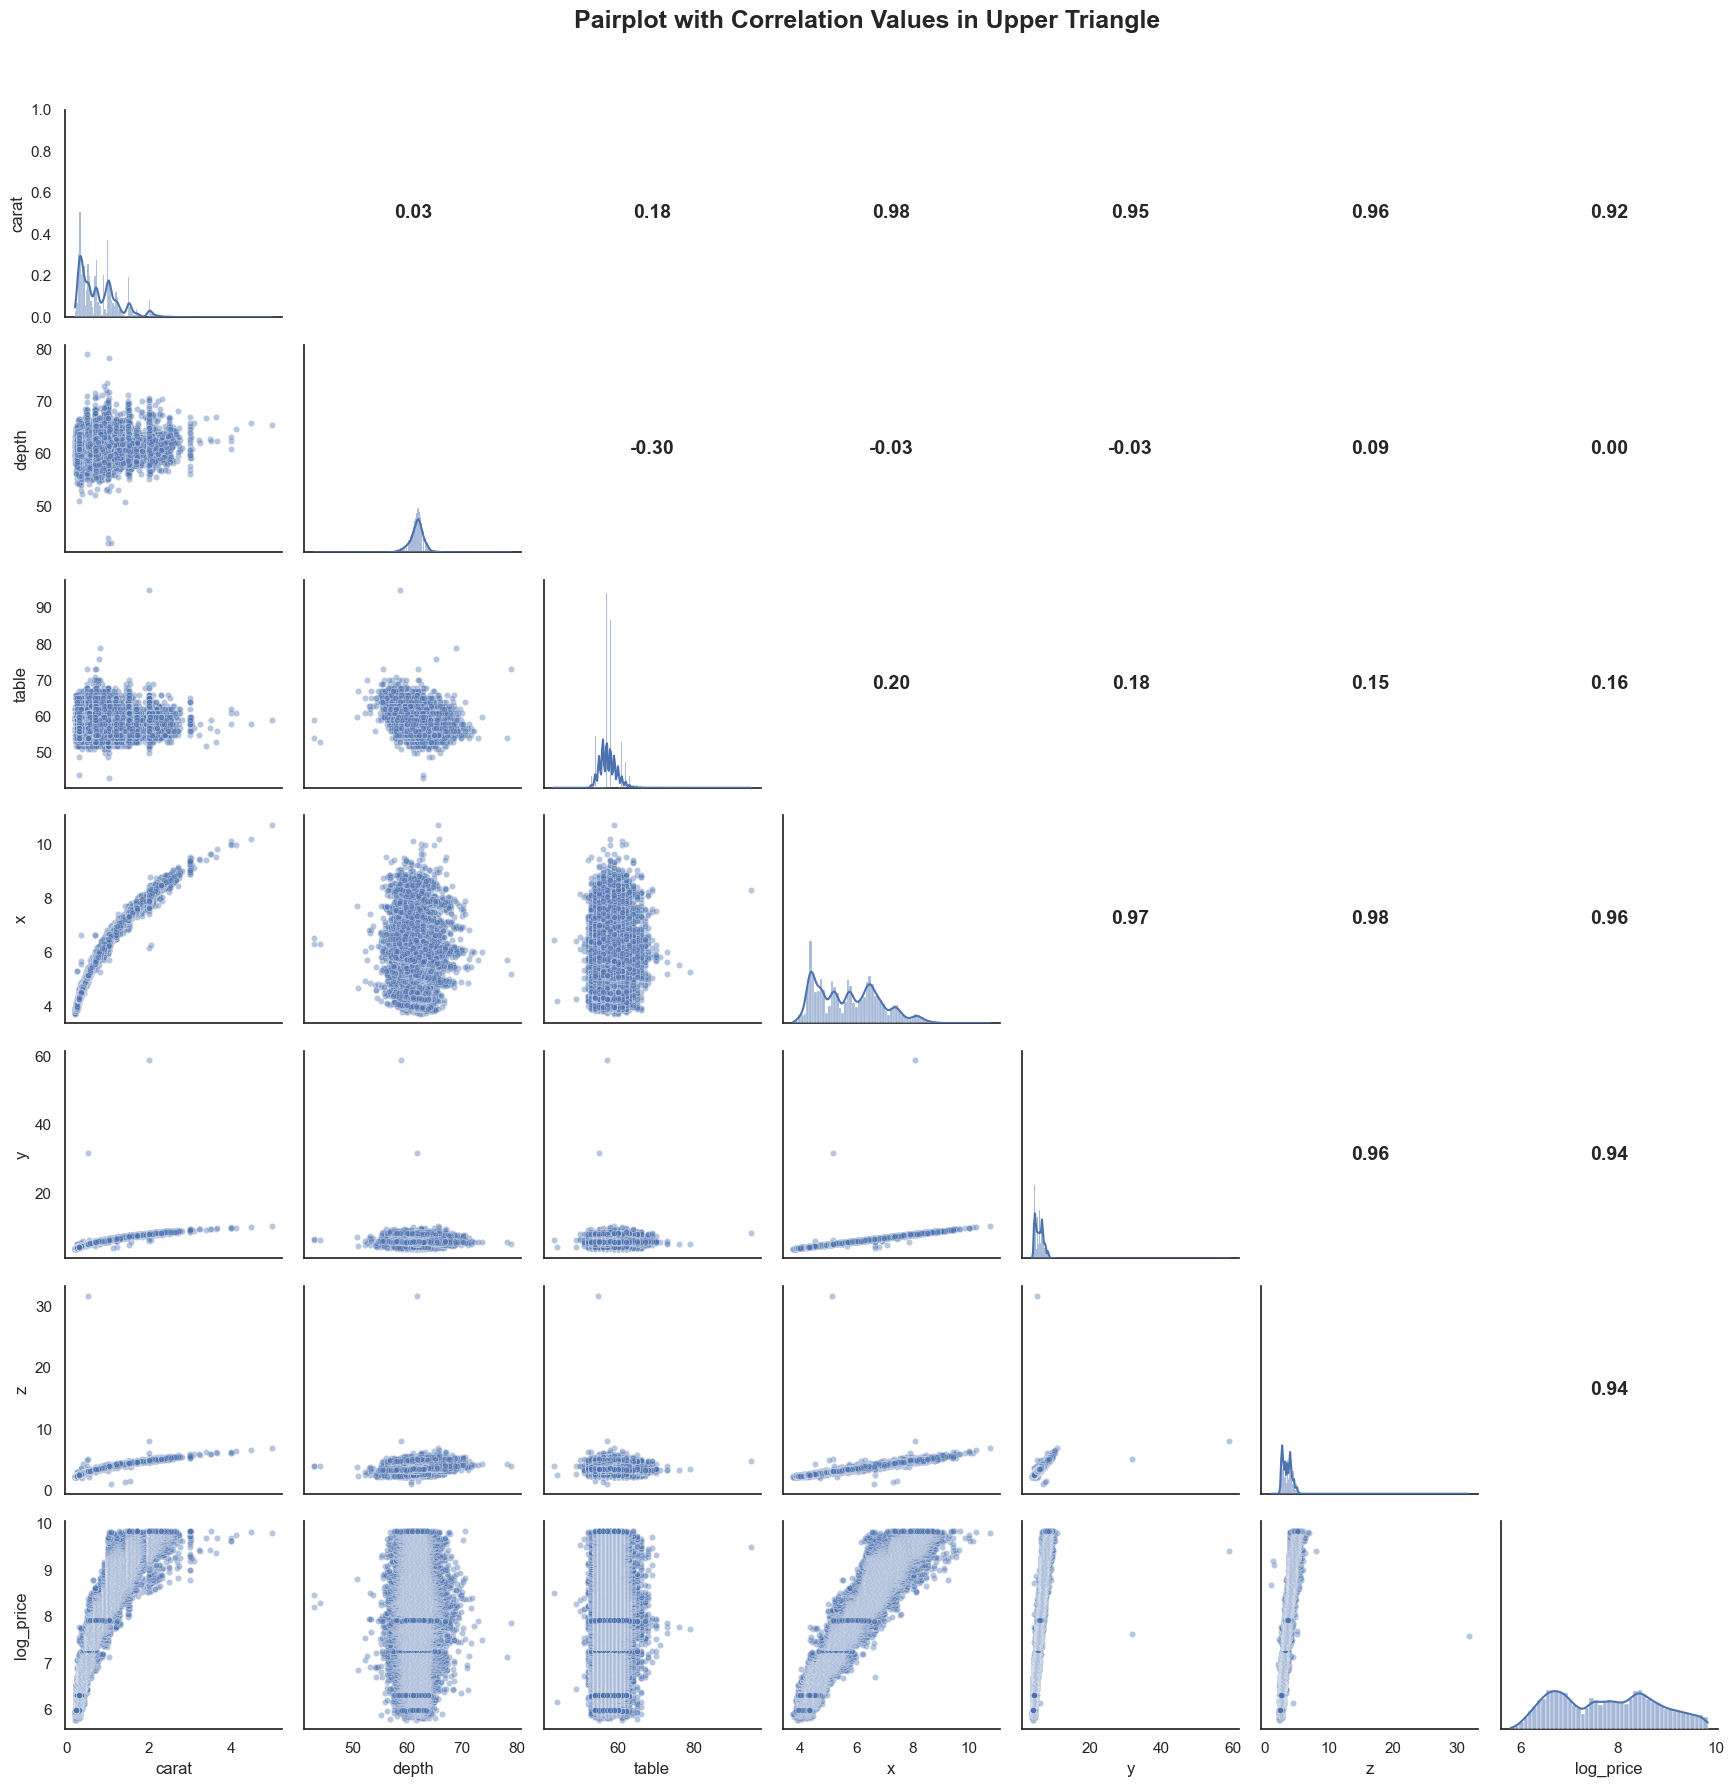

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---------------- data ----------------
use_cols = ["carat","depth","table","x","y","z","log_price"]
df

sns.set_theme(style="white")

# ---------------- correlation text function ----------------
def corr_text(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(
        f"{r:.2f}",
        xy=(0.5, 0.5),
        xycoords=ax.transAxes,
        ha="center",
        va="center",
        fontsize=14,
        fontweight="bold"
    )
    ax.set_axis_off()

# ---------------- PairGrid ----------------
g = sns.PairGrid(df)

# Lower triangle → scatter plots
g.map_lower(
    sns.scatterplot,
    s=20,
    alpha=0.4
)

# Upper triangle → correlation values
g.map_upper(corr_text)

# Diagonal → histograms
g.map_diag(
    sns.histplot,
    kde=True
)

# ---------------- titles & layout ----------------
g.fig.suptitle(
    "Pairplot with Correlation Values in Upper Triangle",
    fontsize=18,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.show()


In [30]:
fig = px.scatter_3d(
    df.sample(min(8000, len(df)), random_state=42),
    x="carat", y="depth", z="log_price",
    color="cut" if "cut" in df.columns else None,
    opacity=0.5,
    title="Multivariate: 3D Scatter (Carat, Depth, log_Price)",
)
fig.show()
